In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate as integrate
from ipywidgets import interact

In [3]:
#Make paraters global
global c
global mu
global nu
global alpha
global beta
global gamma
global delta 

c = 0.19
mu = 0.03
nu = 0.003
alpha = 800
beta = 1.5
gamma = 0.004
delta = 2.2

In [4]:
def xdot(state: tuple , t : np.ndarray, r: float):
    x, y = state
    
    
    cross = (alpha*x*y) * (1/(beta + x))
    
    dxdt = x*(r - c*x)*(x - mu)* (1/(nu + x)) - cross
    dydt = gamma * cross - delta * y
    return [dxdt, dydt]

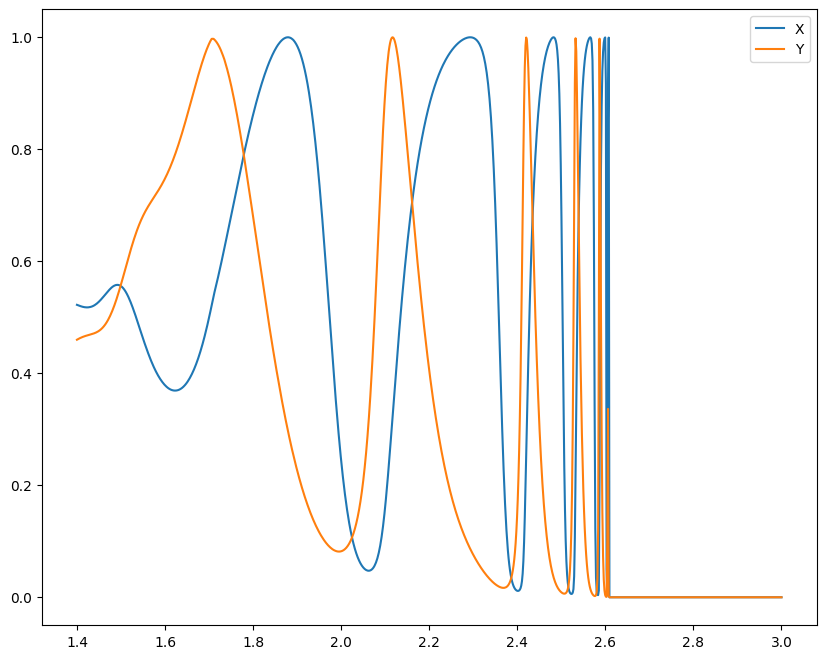

In [10]:
num_pts = 1000
timespan = np.linspace(0, 100, num_pts)
rspan = np.linspace(1.4, 3, num_pts)


#random initial conditions
x0, y0 = 3, 0.010
init= [x0, y0]

x_last = []
y_last = []
for r in rspan:
    sol = integrate.odeint(xdot, init, timespan, args=(r, ))
    x, y = sol.T
    x = x/max(x)
    y = y/max(y)
    x_last.append(x[-1])
    y_last.append(y[-1])



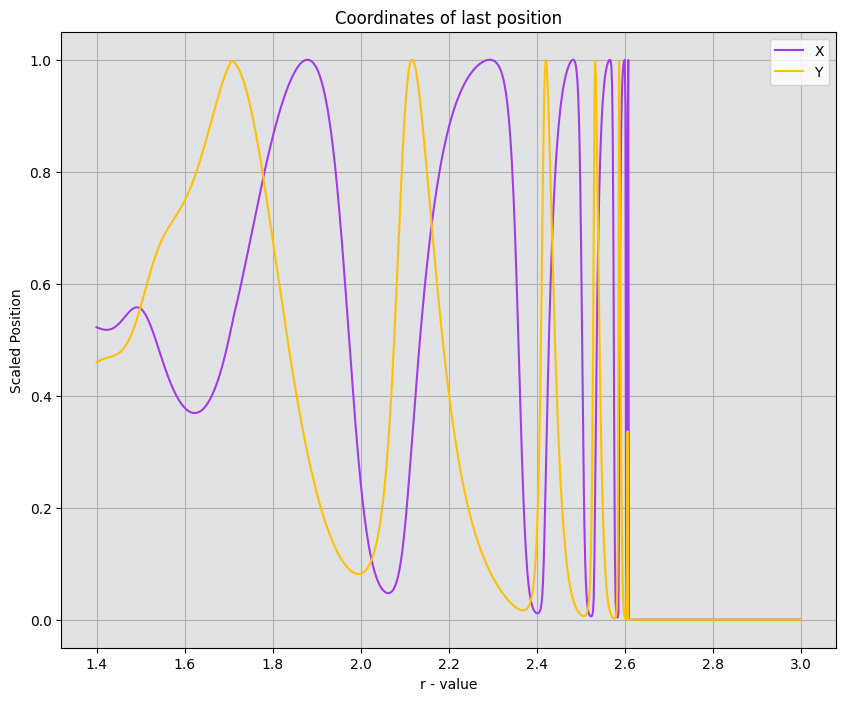

In [15]:
fig, axs = plt.subplots(1, 1, figsize =(10, 8))
axs.plot(rspan, x_last, label = "X", c="#A23BEC")
axs.plot(rspan, y_last, label = "Y", c="#FFC107")
axs.set_title("Coordinates of last position")
axs.set_xlabel("r - value")
axs.set_ylabel("Scaled Position")
axs.set_facecolor("#e1e2e3") 
axs.grid(True)
plt.legend()